In [1]:
import sklearn.datasets
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
#from mlp import normalize,Model
import tensorflow as tf


# Załaduj zbiór danych MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images/255
test_images = test_images/255
# Przekształć etykiety klas na wektory one-hot dla zbioru treningowego
num_classes = 10  # MNIST ma 10 klas (cyfry od 0 do 9)
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels, num_classes)

# Przekształć etykiety klas na wektory one-hot dla zbioru testowego
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels, num_classes)
#
# print(train_labels_one_hot)
# print((train_images[0])/255)

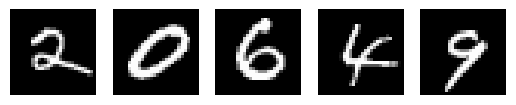

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Załadowanie danych MNIST
# Zakładam, że dane są już dostępne i załadowane do zmiennych X_train i y_train.
# X_train to macierz zawierająca obrazy, a y_train to wektor etykiet odpowiadających obrazom.
# Przykładowo, X_train może mieć kształt (60000, 28, 28), a y_train (60000,).

# Wybierz kilka próbek (na przykład 5) do wyświetlenia
num_samples_to_display = 5
selected_samples_indices = np.random.choice(len(train_images), num_samples_to_display)

# Wyświetlenie próbek wraz z ich etykietami
for i, idx in enumerate(selected_samples_indices):
    image = train_images[idx]/255
    label = train_images[idx]

    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

In [3]:
from math import sqrt
from numpy import mean
from numpy.random import rand


class Conv:

    def __init__(self, number_of_kernels: int, kernel_shape: tuple, input_shape : tuple,stride = (1,1)):
        self.stride = stride # default (1,1)
        self.kernel_shape = (kernel_shape[0],kernel_shape[1],input_shape[2])
        self.kernels = np.array([add_kernel(kernel_shape,input_shape) for a in range(number_of_kernels)]) #creating random kernels
         # define shape of kernel

        # print(self.kernels, self.kernels.shape)

    def forward(self,v_x):
        self.v_x = v_x
        output = np.array([conv_channel(v_x,kernel) for kernel in self.kernels]).transpose(1,2,0)
        return output

    def backward(self,blad,eta):
        ll = self.kernels
        print(blad.shape)

        return 0

def add_kernel(kernel_shape, latent_shape):
    kernel_shape = (kernel_shape[0],kernel_shape[1],latent_shape[2])

    # calculate the range for the weights
    #lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))
    lower, upper = -(1.0 / sqrt(latent_shape[0]*latent_shape[1])), (1.0 / sqrt(latent_shape[0]*latent_shape[1]))
    # generate random numbers
    numbers = rand(kernel_shape[0]*kernel_shape[1]*latent_shape[2])
    # scale to the desired range
    scaled = np.array(lower + numbers * (upper - lower))
    m_w = scaled.reshape(kernel_shape)
    return m_w

def conv_step(latent:np.array,mask:np.array): # confirmed
    # correction test below
    # a = np.array([[[1,3],[2,4],[1,1]],[[3,1],[2,2],[1,1]],[[2,3],[3,1],[1,4]]])
    # b = np.array([[[1,2],[2,2]],[[3,2],[4,2]]])
    # print(a,b)
    # print(conv_step(a[:2,:2],b)) # should return 42 in this case
    # (calculations for dimensions = input ->(3,3,2), filter->(2,2,2))

    product = latent * mask
    return np.sum(product)

def conv_channel(v_x,kernel):

    # new_channel = []
    # for length in range(v_x.shape[1] - kernel.shape[1] + 1):
    #     new_channel_l = []
    #     for height in range(v_x.shape[0] - kernel.shape[0] + 1):
    #         new_channel_l.append(conv_step(v_x[length:length+kernel.shape[1],height:height+kernel.shape[0]],kernel))
    #
    #     new_channel.append(new_channel_l)

    new_channel = [[conv_step(v_x[length:length+kernel.shape[1],height:height+kernel.shape[0]],kernel)
                   for height in range(v_x.shape[0] - kernel.shape[0] + 1) ]
                   for length in range(v_x.shape[1] - kernel.shape[1] + 1) ]
    return np.array(new_channel)


# class Kernel:
#     def __init__(self,kernel_shape, latent_shape):
#         self.kernel_shape = (kernel_shape[0],kernel_shape[1],latent_shape[2])
#
#         # calculate the range for the weights
#         lower, upper = -(1.0 / sqrt(latent_shape[0]*latent_shape[1])), (1.0 / sqrt(latent_shape[0]*latent_shape[1]))
#         # generate random numbers
#         numbers = rand(self.kernel_shape[0]*self.kernel_shape[1]*latent_shape[2])
#         # scale to the desired range
#         scaled = np.array(lower + numbers * (upper - lower))
#         self.m_w = scaled.reshape(self.kernel_shape)
#
#     def __getitem__(self, item):
#         return self.m_w[item]
#
#     def __setitem__(self, key, value):
#         self.m_w[key] = value
#
#     def __call__(self):
#         return self.m_w
#
#     def __str__(self):
#         return str(self.m_w)
#
#     def __len__(self):
#         return len(self.m_w)




(26, 26, 3)


(-0.5, 25.5, 25.5, -0.5)

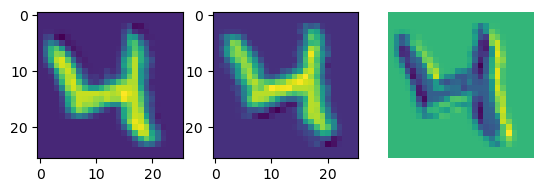

In [21]:
test = Conv(3,(3,3),(28,28,1))
l =train_images[20].reshape(28,28,1)
gg = test.forward(l)


# gg = gg**2
# gg = (gg - np.min(gg)) / (np.max(gg) - np.min(gg))
print((gg.shape))
plt.subplot(1,3,1)
plt.imshow(gg.transpose(2,0,1)[0])
plt.subplot(1,3,2)
plt.imshow(gg.transpose(2,0,1)[1])
plt.subplot(1,3,3)
plt.imshow(gg.transpose(2,0,1)[2])
plt.axis('off')



In [231]:
print(test.kernels[0])

[[[-0.00936371]
  [ 0.00261848]
  [-0.00981515]]

 [[-0.01127122]
  [-0.03296194]
  [ 0.03489731]]

 [[ 0.01811676]
  [-0.0057355 ]
  [-0.01762101]]]


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

(-0.5, 27.5, 27.5, -0.5)

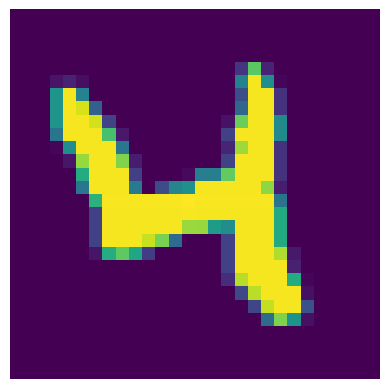

In [215]:
print(l)

plt.imshow(l)
plt.axis('off')


In [86]:

a = np.array([[[1,3],[2,4],[3,1]],[[3,1],[2,2],[1,1]],[[2,3],[3,1],[1,2]]])
b = np.array([[[1,2],[2,2]],[[3,2],[4,2]]])
print(a,b)
print(a,b)
print(conv_step(a[:2,:2],b))


[[[1 3]
  [2 4]
  [3 1]]

 [[3 1]
  [2 2]
  [1 1]]

 [[2 3]
  [3 1]
  [1 2]]] [[[1 2]
  [2 2]]

 [[3 2]
  [4 2]]]
[[[1 3]
  [2 4]
  [3 1]]

 [[3 1]
  [2 2]
  [1 1]]

 [[2 3]
  [3 1]
  [1 2]]] [[[1 2]
  [2 2]]

 [[3 2]
  [4 2]]]
42


In [96]:


a = np.array([[[1,3],[2,4],[3,1]],[[3,1],[2,2],[1,1]],[[2,3],[3,1],[1,2]]])
b = np.array([[[1,2],[2,2]],[[3,2],[4,2]]])
#print(a,b)
print(a.shape,b.shape)
print(a[0:2,0:2])
# print(conv_step(a,b))
print(conv_channel(a,b).shape)

(3, 3, 2) (2, 2, 2)
[[[1 3]
  [2 4]]

 [[3 1]
  [2 2]]]
(2, 2)


In [111]:
import numpy as np
from scipy import signal
from scipy import datasets

grad = signal.convolve2d(a, b, boundary='wrap', mode='full')
print(grad)

[[10  8 10 10]
 [ 9  6  9  9]
 [ 7  8  8  7]
 [10  8 10 10]]


In [121]:
k = add_kernel((3,3),(28,28,1))
l =train_images[0].reshape(28,28,1)

In [150]:
print(k.shape,l.shape)
a = convolution(k,l)



(3, 3, 1) (28, 28, 1)


ValueError: could not broadcast input array from shape (26,26) into shape (30,30)

(30, 30, 1)


(-0.5, 29.5, 29.5, -0.5)

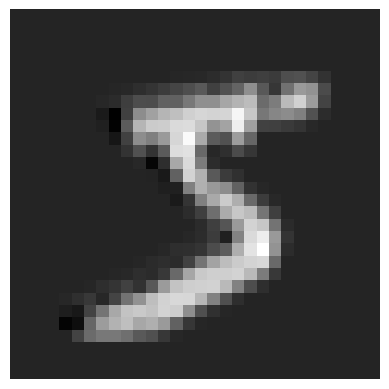

In [142]:
#plt.subplot(1, 2)
print(a.shape)
plt.imshow(a, cmap='gray')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

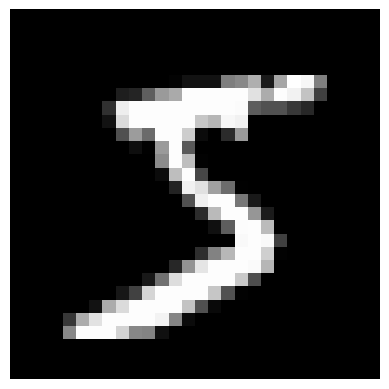

In [141]:
plt.imshow(l, cmap='gray')
plt.axis('off')

In [149]:
import numpy as np
from scipy.signal import convolve2d

def convolution(kernel, matrix):
    a, b, c = kernel.shape
    d, e, c_matrix = matrix.shape

    if c != c_matrix:
        raise ValueError("The third dimension of the kernel and the matrix must be the same.")

    result = np.zeros((d + a - 1, e + b - 1, c))

    for channel in range(c):
        kernel_channel = kernel[:, :, channel]
        matrix_channel = matrix[:, :, channel]
        result_channel = convolve2d(matrix_channel, kernel_channel, mode='valid')
        result[:, :, channel] = result_channel

    return result

# Sample kernel and matrix dimensions
a, b, c = 3, 3, 3
d, e, c_matrix = 5, 5, 3

# Sample kernel and matrix (assuming they are already loaded)
kernel = np.random.rand(a, b, c)
matrix = np.random.rand(d, e, c_matrix)

# Perform convolution
result = convolution(kernel, matrix)

# Display the resulting matrix after convolution
print(result)


ValueError: could not broadcast input array from shape (3,3) into shape (7,7)